In [2]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
from functools import partial

In [3]:
#function 1
def cube_func(x):
    return x ** 3

#function 2
def abs_func(x):
    return abs(x - 0.2)

#function 3
def sin_func(x):
    return x * np.sin(1 / x)

eps = 1e-3

**One-dimensional search functions**

In [4]:
def exhaustive_search(start, stop, eps, func):
    amount = int((stop-start)/eps) + 1
    x = np.linspace(start, stop, amount)
    vals = np.array(list(map(func, x)))
    minpos = np.argmin(vals)
    arg = x[minpos]
    min_value = func(arg)
    iters = amount
    f_calc = amount
    return arg, min_value, iters, f_calc

def dichotomy_search(start, stop, eps, func):
    delta = eps / 2
    iters = 0
    f_calc = 1
    x1 = (start + stop - delta) / 2
    x2 = (start + stop + delta) / 2
    while abs(start - stop) > eps:
        if func(x1) <= func(x2):
            stop = x2
        else:
            start = x1
        x1 = (start + stop - delta) / 2
        x2 = (start + stop + delta) / 2
        iters += 1
        f_calc += 1
    arg = (x1 + x2) / 2
    min_value = func(arg)
    return arg, min_value, iters, f_calc

def golden_section_search(start, stop, eps, func):
    gs = (3 - 5 ** 0.5) / 2
    x1 = start + gs * (stop - start)
    x2 = stop - gs * (stop - start)
    iters = 0
    while abs(start - stop) > eps:
        if func(x1) <= func(x2):
            stop = x2
            x2 = x1
            x1 = start + gs * (stop - start)
        else:
            start = x1
            x1 = x2
            x2 = stop - gs * (stop - start)
        iters += 1
    f_calc = iters + 1
    arg = (x1 + x2) / 2
    min_value = func(arg)
    return arg, min_value, iters, f_calc

def search_results(start, stop, eps, func, method):
    print('argument = {:.4f}, min value = {:.4f}, iterations = {}, f-calculations = {}'
        .format(*method(start, stop, eps, func)))

**Search results for exhaustive search**

In [5]:
search_results(0, 1, eps, cube_func, exhaustive_search)
search_results(0, 1, eps, abs_func, exhaustive_search)
search_results(0.01, 1, eps, sin_func, exhaustive_search)

argument = 0.0000, min value = 0.0000, iterations = 1001, f-calculations = 1001
argument = 0.2000, min value = 0.0000, iterations = 1001, f-calculations = 1001
argument = 0.2230, min value = -0.2172, iterations = 991, f-calculations = 991


**Search results for dichotomy**

In [6]:
search_results(0, 1, eps, cube_func, dichotomy_search)
search_results(0, 1, eps, abs_func, dichotomy_search)
search_results(0.01, 1, eps, sin_func, dichotomy_search)

argument = 0.0005, min value = 0.0000, iterations = 11, f-calculations = 12
argument = 0.2001, min value = 0.0001, iterations = 11, f-calculations = 12
argument = 0.2226, min value = -0.2172, iterations = 11, f-calculations = 12


**Search results for golden
section**

In [7]:
search_results(0, 1, eps, cube_func, golden_section_search)
search_results(0, 1, eps, abs_func, golden_section_search)
search_results(0.01, 1, eps, sin_func, golden_section_search)

argument = 0.0004, min value = 0.0000, iterations = 15, f-calculations = 16
argument = 0.2001, min value = 0.0001, iterations = 15, f-calculations = 16
argument = 0.2227, min value = -0.2172, iterations = 15, f-calculations = 16


**RNG**

In [29]:
k_sz = 101
np.random.seed(359)

alpha = np.random.rand(1)
beta = np.random.rand(1)
x = np.linspace(0, 1, k_sz)

yk = alpha * x + beta 
yk_noise = yk + np.random.randn(k_sz)

alpha, beta

(array([0.87894558]), array([0.70002342]))

In [30]:
def linear_appr(x, a, b):
    return np.array(list(map(lambda v: a * v + b, x)))

def rational_appr(x, a, b):
    return np.array(list(map(lambda v: a / (1 + b * v), x)))

def obj_func(params, vals, x, func_name):
    a, b = params
    if func_name == 'rational':
        return sum((vals - rational_appr(x, a, b)) ** 2)
    return sum((vals - linear_appr(x, a, b)) ** 2)

**Linear approximation**

In [31]:
args_lin = (yk_noise, x, 'linear')

exhaustive_lin = opt.brute(obj_func, [[0, 0], [0, 0]], args = args_lin, Ns = int(1 / eps) + 1)
gauss_lin = opt.minimize(obj_func, [0, 0], args = args_lin, tol = eps, method = 'Powell')
nelder_mead_lin = opt.minimize(obj_func, [0, 0], args = args_lin, tol = eps, method = 'Nelder-Mead')

**Exhaustive search linear**

In [32]:
print(exhaustive_lin)

[0.82849352 0.82059553]


**Gauss linear**

In [33]:
print(gauss_lin)

   direc: array([[ 0.        ,  1.        ],
       [-0.91403319,  0.45701659]])
     fun: 109.7256138854704
 message: 'Optimization terminated successfully.'
    nfev: 95
     nit: 3
  status: 0
 success: True
       x: array([0.82846138, 0.82061899])


**Nelder-Mead linear** 

In [34]:
print(nelder_mead_lin)

 final_simplex: (array([[0.82907922, 0.82030307],
       [0.82816088, 0.82060397],
       [0.82927427, 0.81996693]]), array([109.72561717, 109.72561742, 109.72562565]))
           fun: 109.7256171676174
       message: 'Optimization terminated successfully.'
          nfev: 113
           nit: 57
        status: 0
       success: True
             x: array([0.82907922, 0.82030307])


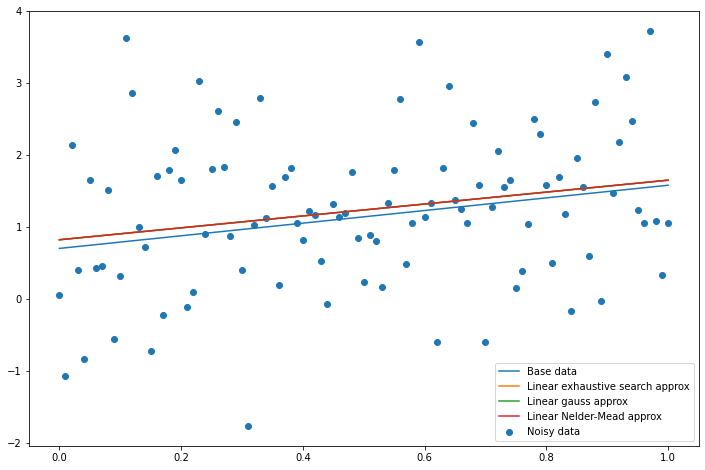

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(x, yk)
plt.plot(x, linear_appr(x, *exhaustive_lin))
plt.plot(x, linear_appr(x, *gauss_lin.x))
plt.plot(x, linear_appr(x, *nelder_mead_lin.x))
plt.scatter(x, yk_noise)
plt.legend(['Base data', 'Linear exhaustive search approx',
           'Linear gauss approx', 'Linear Nelder-Mead approx', 'Noisy data'])
plt.show()

**Rational approximation**

In [36]:
args_rat = (yk_noise, x, 'rational')
bounds_rat=[[-1, 1], [-1, 1]]

exhaustive_rat = opt.brute(obj_func, [[0, 1], [0, 1]], args = args_rat, Ns = int(1 / eps) + 1)
gauss_rat = opt.minimize(obj_func, [0, 0], args = args_rat, tol = eps, method = 'Powell')
nelder_mead_rat = opt.minimize(obj_func, [0, 0], args = args_rat, tol = eps, method = 'Nelder-Mead')

**Exhaustive search rational**

In [37]:
print(exhaustive_rat)

[ 0.91364147 -0.47087945]


**Gauss rational**

In [38]:
print(gauss_rat)

   direc: array([[ 0.        ,  1.        ],
       [-0.23269687, -0.22317859]])
     fun: 109.95062023116903
 message: 'Optimization terminated successfully.'
    nfev: 75
     nit: 3
  status: 0
 success: True
       x: array([ 0.91339512, -0.47029573])


**Nelder-Mead rational**

In [39]:
print(nelder_mead_rat)

 final_simplex: (array([[ 0.9137492 , -0.47060497],
       [ 0.91418845, -0.47013993],
       [ 0.91357154, -0.47136222]]), array([109.95049858, 109.95051934, 109.95052587]))
           fun: 109.95049857791341
       message: 'Optimization terminated successfully.'
          nfev: 106
           nit: 54
        status: 0
       success: True
             x: array([ 0.9137492 , -0.47060497])


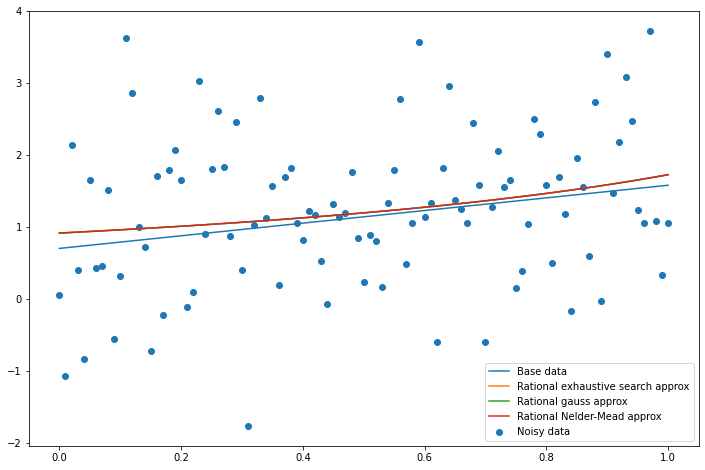

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(x, yk)
plt.plot(x, rational_appr(x, *exhaustive_rat))
plt.plot(x, rational_appr(x, *gauss_rat.x))
plt.plot(x, rational_appr(x, *nelder_mead_rat.x))
plt.scatter(x, yk_noise)
plt.legend(['Base data', 'Rational exhaustive search approx',
           'Rational gauss approx', 'Rational Nelder-Mead approx', 'Noisy data'])
plt.show()